In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector


In [2]:
sales_data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
             '2024-01-10', '2024-01-15', '2024-01-20', '2024-01-25', '2024-01-30',
             '2024-02-01', '2024-02-05', '2024-02-10', '2024-02-15', '2024-02-20',
             '2024-02-25', '2024-03-01', '2024-03-05', '2024-03-10', '2024-03-15'],
    'Product': ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Laptop',
                'Keyboard', 'Mouse', 'Monitor', 'Laptop', 'Keyboard',
                'Monitor', 'Mouse', 'Laptop', 'Monitor', 'Keyboard',
                'Mouse', 'Laptop', 'Monitor', 'Mouse', 'Keyboard'],
    'Region': ['North', 'South', 'East', 'West', 'North',
               'South', 'East', 'West', 'North', 'South',
               'East', 'West', 'North', 'South', 'East',
               'West', 'North', 'South', 'East', 'West'],
    'Quantity': [5, 15, np.nan, 8, 3,
                 12, 20, 5, np.nan, 7,
                 10, 8, 6, 12, np.nan,
                 9, 15, 10, 14, 11],
    'Sales': [5000, 150, 300, 2000, 4500,
              400, 120, 2200, 5000, 350,
              600, 300, 4000, 2000, 1200,
              900, 5000, 1200, 700, 800]
}

df = pd.DataFrame(sales_data)

In [7]:
df.to_csv('sales_data.csv', index=False)
print(df)

print(df.isnull().sum())

          Date   Product Region  Quantity  Sales
0   2024-01-01    Laptop  North       5.0   5000
1   2024-01-02     Mouse  South      15.0    150
2   2024-01-03  Keyboard   East       NaN    300
3   2024-01-04   Monitor   West       8.0   2000
4   2024-01-05    Laptop  North       3.0   4500
5   2024-01-10  Keyboard  South      12.0    400
6   2024-01-15     Mouse   East      20.0    120
7   2024-01-20   Monitor   West       5.0   2200
8   2024-01-25    Laptop  North       NaN   5000
9   2024-01-30  Keyboard  South       7.0    350
10  2024-02-01   Monitor   East      10.0    600
11  2024-02-05     Mouse   West       8.0    300
12  2024-02-10    Laptop  North       6.0   4000
13  2024-02-15   Monitor  South      12.0   2000
14  2024-02-20  Keyboard   East       NaN   1200
15  2024-02-25     Mouse   West       9.0    900
16  2024-03-01    Laptop  North      15.0   5000
17  2024-03-05   Monitor  South      10.0   1200
18  2024-03-10     Mouse   East      14.0    700
19  2024-03-15  Keyb

In [8]:
data = df.dropna()  # Drops rows with missing data


In [9]:
data

,Date,Product,Region,Quantity,Sales
0,2024-01-01,Laptop,North,5.0,5000
1,2024-01-02,Mouse,South,15.0,150
3,2024-01-04,Monitor,West,8.0,2000
4,2024-01-05,Laptop,North,3.0,4500
5,2024-01-10,Keyboard,South,12.0,400
6,2024-01-15,Mouse,East,20.0,120
7,2024-01-20,Monitor,West,5.0,2200
9,2024-01-30,Keyboard,South,7.0,350
10,2024-02-01,Monitor,East,10.0,600
11,2024-02-05,Mouse,West,8.0,300


In [10]:
# total sales
total_sales = df['Sales'].sum()
print(f'Total Sales: {total_sales}')


Total Sales: 36720


In [11]:
# Region-wise Sales:
region_sales = data.groupby('Region')['Sales'].sum().reset_index()
print(region_sales)


  Region  Sales
0   East   1420
1  North  18500
2  South   4100
3   West   6200


In [15]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year for analysis
df['Month'] = df['Date'].dt.to_period('M')

# Group by month to get monthly sales
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
print(monthly_sales)

     Month  Sales
0  2024-01  20020
1  2024-02   9000
2  2024-03   7700


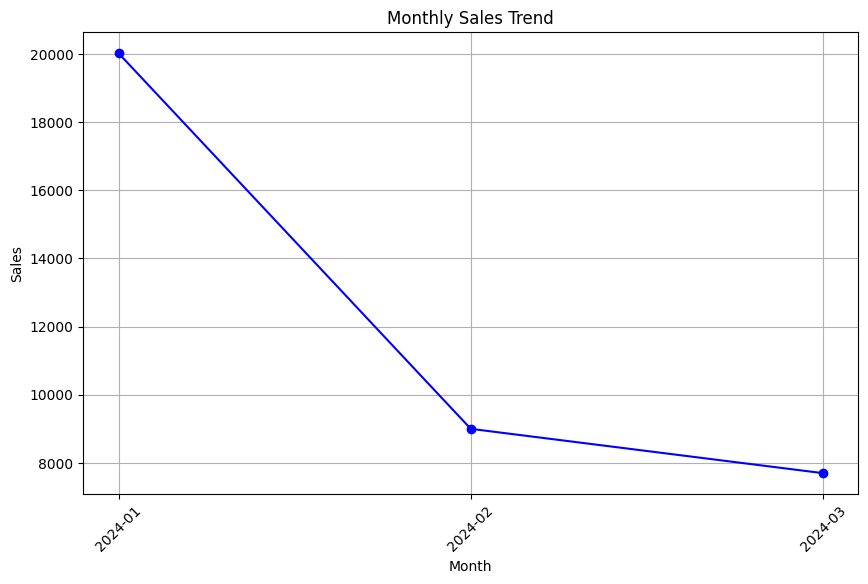

In [17]:
# Plot monthly sales trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Sales'], marker='o', color='b')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

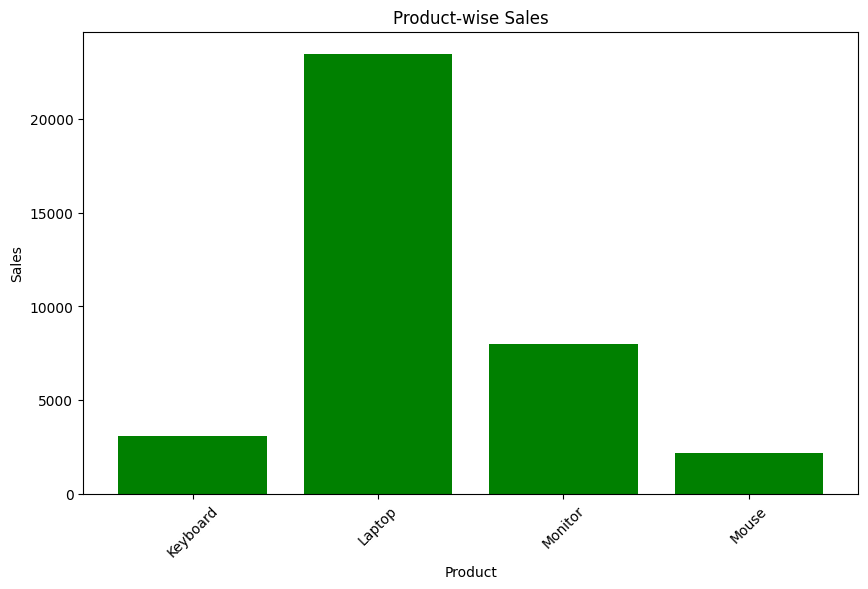

In [18]:
# Group by Product to get total sales per product
product_sales = df.groupby('Product')['Sales'].sum().reset_index()

# Plot product-wise sales
plt.figure(figsize=(10, 6))
plt.bar(product_sales['Product'], product_sales['Sales'], color='green')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Product-wise Sales')
plt.xticks(rotation=45)
plt.show()

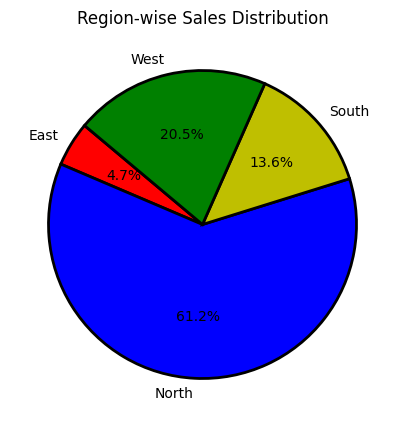

In [26]:
# Plot region-wise sales as a pie chart
plt.figure(figsize=(5,5))
c=["r","b","y","g"]
plt.pie(region_sales['Sales'], labels=region_sales['Region'], autopct='%1.1f%%', startangle=140,
        wedgeprops= {"linewidth":2, "edgecolor":"black"}, colors=c)
plt.title('Region-wise Sales Distribution')
plt.show()


In [56]:
# Save the data in sql file or table for future need.(optional)

# Establish MySQL connection
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="admin",
    database="sales_db"
)

In [57]:
# Create a cursor object
cursor = conn.cursor()

In [58]:
# Insert data into MySQL table (assuming a 'sales' table is created)

for index, row in data.iterrows():
    sql = "INSERT INTO sales1 (Date, Product, Region, Quantity, Sales) VALUES (%s, %s, %s, %s, %s)"
    cursor.execute(sql, (row['Date'], row['Product'], row['Region'], row['Quantity'], row['Sales']))

In [61]:
# Commit and close connection
conn.commit()
cursor.close()
conn.close()